#Data Preparation



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
user = pd.read_csv("/content/drive/MyDrive/bds/step1.csv", sep=',', lineterminator='\n')

user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",NaN,False,1698,4,53,2016-10-15 21:32:11,4,False,False,13097,NaN,False,False,False
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,https://t.co/DJ4TYZgm7Q,False,823,852,5,2016-11-09 05:01:30,516,False,False,251,NaN,False,False,False
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",https://t.co/jIrurMaqEX,False,193,805,2,2017-06-17 05:34:27,4105,True,False,1201,NaN,False,False,False
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,NaN,False,569,659,2,2016-07-21 13:32:25,10086,True,False,1648,NaN,True,True,False
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",NaN,False,748235,118,1818,2012-01-15 16:32:35,152,True,True,4292,NaN,True,False,False


In [3]:
user["protected"] = user["protected"].astype(int)
user["geo_enabled"] = user["geo_enabled"].astype(int)
user["verified"] = user["verified"].astype(int)
user["profile_use_background_image"] = user["profile_use_background_image"].astype(int)
user["default_profile"] = user["default_profile"].astype(int)
user["default_profile_image"] = user["default_profile_image"].astype(int)
for i in user.index:
  if user["url"][i] is None:
    user["url"][i] = 0
  else:
    user["url"][i] = 1
user.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0


##add account age

In [4]:
type(user['created_at'][i])

str

In [5]:
import datetime;
  
# ct stores current time
today = datetime.datetime.now()
today = pd.to_datetime(today)
type(today)

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
for i in user.index:
  user['created_at'][i] = pd.to_datetime(user['created_at'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
type(user['created_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
account_age = []
for i in user.index:
  account_age.append( (today - user['created_at'][i]).days )

In [9]:
user['account_age'] = account_age
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1678
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1653
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1433
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1764
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3413


##add log_follower_growth_rate

In [10]:
log_follower_growth_rate = []
for i in user.index:
  log_follower_growth_rate.append( user['followers_count'][i] / user['account_age'][i])
#print(log_follower_growth_rate)

In [11]:
user['log_follower_growth_rate'] = log_follower_growth_rate
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1678,1.011919
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1653,0.497883
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1433,0.134682
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1764,0.322562
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3413,219.230882


##add log_friends_growth_rate

In [12]:
log_friends_growth_rate = []
for i in user.index:
  log_friends_growth_rate.append( user['friends_count'][i] / user['account_age'][i])
#print(log_friends_growth_rate)

In [13]:
user['log_friends_growth_rate'] = log_friends_growth_rate
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1678,1.011919,0.002384
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1653,0.497883,0.515426
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1433,0.134682,0.561759
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1764,0.322562,0.373583
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3413,219.230882,0.034574


##add popularity

In [14]:
popularity = []
for i in user.index:
  popularity.append( user['followers_count'][i] / (user['followers_count'][i] + user['friends_count'][i]) )
#print(popularity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
user['popularity'] = popularity
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1678,1.011919,0.002384,0.997650
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1653,0.497883,0.515426,0.491343
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1433,0.134682,0.561759,0.193387
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1764,0.322562,0.373583,0.463355
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3413,219.230882,0.034574,0.999842


##add log_friends_follower_ratio

In [16]:
log_friends_follower_ratio = []
for i in user.index:
  log_friends_follower_ratio.append( user['friends_count'][i] / user['followers_count'][i])
#print(log_friends_follower_ratio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
user['log_friends_follower_ratio'] = log_friends_follower_ratio
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1678,1.011919,0.002384,0.997650,0.002356
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1653,0.497883,0.515426,0.491343,1.035237
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1433,0.134682,0.561759,0.193387,4.170984
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1764,0.322562,0.373583,0.463355,1.158172
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3413,219.230882,0.034574,0.999842,0.000158


##modify to logs counts

In [18]:
userNum = user
del userNum['Unnamed: 0']
del userNum['id']
del userNum['screen_name']
del userNum['location']
userNum['description']
del userNum['created_at']
del userNum['lang']
userNum.head()

,is_bot,description,url,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,4,0,0,13097,0,0,0,1678,1.011919,0.002384,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,1,0,823,852,5,516,0,0,251,0,0,0,1653,0.497883,0.515426,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,4105,1,0,1201,0,0,0,1433,0.134682,0.561759,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,10086,1,0,1648,1,1,0,1764,0.322562,0.373583,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,152,1,1,4292,1,0,0,3413,219.230882,0.034574,0.999842,0.000158


In [19]:
userNum.rename(columns = {'followers_count' : 'log_followers_count', 'friends_count' : 'log_friends_count', 'listed_count' : 'log_listed_count', 'favourites_count' : 'log_favourites_count', 'statuses_count' : 'log_statuses_count'}, inplace = True)

In [20]:
userNum.head()

,is_bot,description,url,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,geo_enabled,verified,log_statuses_count,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,4,0,0,13097,0,0,0,1678,1.011919,0.002384,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,1,0,823,852,5,516,0,0,251,0,0,0,1653,0.497883,0.515426,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,4105,1,0,1201,0,0,0,1433,0.134682,0.561759,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,10086,1,0,1648,1,1,0,1764,0.322562,0.373583,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,152,1,1,4292,1,0,0,3413,219.230882,0.034574,0.999842,0.000158


In [21]:
del userNum['url']
userNum['protected']
del userNum['geo_enabled']
userNum['verified']
del userNum['profile_use_background_image']
userNum['default_profile']
del userNum['default_profile_image']
userNum.head()


,is_bot,description,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",0,1698,4,53,4,0,13097,0,1678,1.011919,0.002384,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,0,823,852,5,516,0,251,0,1653,0.497883,0.515426,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",0,193,805,2,4105,0,1201,0,1433,0.134682,0.561759,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,0,569,659,2,10086,0,1648,1,1764,0.322562,0.373583,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",0,748235,118,1818,152,1,4292,0,3413,219.230882,0.034574,0.999842,0.000158


In [22]:
type(userNum['log_follower_growth_rate'][0])

numpy.float64

In [23]:
userNum['log_followers_count'] = userNum['log_followers_count'].astype(np.float64)
userNum['log_friends_count'] = userNum['log_friends_count'].astype(np.float64)
userNum['log_listed_count'] = userNum['log_listed_count'].astype(np.float64)
userNum['log_favourites_count'] = userNum['log_favourites_count'].astype(np.float64)
userNum['log_statuses_count'] = userNum['log_statuses_count'].astype(np.float64)
#for i in userNum.index:
#  userNum['description'][i] = userNum['description'][i][0]

In [24]:
userNum.head()

,is_bot,description,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",0,1698.0,4.0,53.0,4.0,0,13097.0,0,1678,1.011919,0.002384,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,0,823.0,852.0,5.0,516.0,0,251.0,0,1653,0.497883,0.515426,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",0,193.0,805.0,2.0,4105.0,0,1201.0,0,1433,0.134682,0.561759,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,0,569.0,659.0,2.0,10086.0,0,1648.0,1,1764,0.322562,0.373583,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",0,748235.0,118.0,1818.0,152.0,1,4292.0,0,3413,219.230882,0.034574,0.999842,0.000158


In [25]:
userNum['description'] = userNum['description'].astype(str).str.replace('/',' ')

In [26]:
type(userNum['description'][0])

str

In [27]:
descrip = []
for i in userNum.index:
  descrip.append( userNum['description'][i] )
#print(descrip)

In [28]:
userNum['descrip'] = descrip
del userNum['description']
userNum.head()


,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip
0,1,0,1698.0,4.0,53.0,4.0,0,13097.0,0,1678,1.011919,0.002384,0.997650,0.002356,"Blame @xaiax, Inspired by @MakingInvisible, us..."
1,0,0,823.0,852.0,5.0,516.0,0,251.0,0,1653,0.497883,0.515426,0.491343,1.035237,Photographing the American West since 1980. I ...
2,1,0,193.0,805.0,2.0,4105.0,0,1201.0,0,1433,0.134682,0.561759,0.193387,4.170984,"Part savage, all gentleman 🧐\n ..."
3,1,0,569.0,659.0,2.0,10086.0,0,1648.0,1,1764,0.322562,0.373583,0.463355,1.158172,Wife.Godmother.Friend.Feline Fanatic! Assistan...
4,0,0,748235.0,118.0,1818.0,152.0,1,4292.0,0,3413,219.230882,0.034574,0.999842,0.000158,"Loans Manager @mancity, @pumafootball Ambassad..."


In [29]:
for i in userNum.index:
  if userNum['log_followers_count'][i] == 0:
    userNum['log_followers_count'][i] = -1
  else:
    userNum['log_followers_count'][i] =  np.log(userNum['log_followers_count'][i])

  if userNum['log_friends_count'][i] == 0:
    userNum['log_friends_count'][i] = -1
  else:
    userNum['log_friends_count'][i] =  np.log(userNum['log_friends_count'][i])

  if userNum['log_listed_count'][i] == 0:
    userNum['log_listed_count'][i] = -1
  else:
    userNum['log_listed_count'][i] =  np.log(userNum['log_listed_count'][i])

  if userNum['log_favourites_count'][i] == 0:
    userNum['log_favourites_count'][i] = -1
  else:
    userNum['log_favourites_count'][i] =  np.log(userNum['log_favourites_count'][i])

  if userNum['log_statuses_count'][i] == 0:
    userNum['log_statuses_count'][i] = -1
  else:
    userNum['log_statuses_count'][i] =  np.log(userNum['log_statuses_count'][i])

  if userNum['log_follower_growth_rate'][i] == 0:
    userNum['log_follower_growth_rate'][i] = -1
  else:
    userNum['log_follower_growth_rate'][i] =  np.log(userNum['log_follower_growth_rate'][i])

  if userNum['log_friends_growth_rate'][i] == 0:
    userNum['log_friends_growth_rate'][i] = -1
  else:
    userNum['log_friends_growth_rate'][i] =  np.log(userNum['log_friends_growth_rate'][i])

  if userNum['log_friends_follower_ratio'][i] == 0:
    userNum['log_friends_follower_ratio'][i] = -1
  else:
    userNum['log_friends_follower_ratio'][i] =  np.log(userNum['log_friends_follower_ratio'][i])

userNum.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/l

,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip
0,1,0,7.437206,1.386294,3.970292,1.386294,0,9.480138,0,1678,0.011848,-6.039064,0.997650,-6.050912,"Blame @xaiax, Inspired by @MakingInvisible, us..."
1,0,0,6.712956,6.747587,1.609438,6.246107,0,5.525453,0,1653,-0.697391,-0.662761,0.491343,0.034630,Photographing the American West since 1980. I ...
2,1,0,5.262690,6.690842,0.693147,8.319961,0,7.090910,0,1433,-2.004835,-0.576683,0.193387,1.428152,"Part savage, all gentleman 🧐\n ..."
3,1,0,6.343880,6.490724,0.693147,9.218904,0,7.407318,1,1764,-1.131459,-0.984616,0.463355,0.146843,Wife.Godmother.Friend.Feline Fanatic! Assistan...
4,0,0,13.525472,4.770685,7.505492,5.023881,1,8.364508,0,3413,5.390125,-3.364662,0.999842,-8.754788,"Loans Manager @mancity, @pumafootball Ambassad..."


In [30]:
#print(userNum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_bot                      36590 non-null  int64  
 1   protected                   36590 non-null  int64  
 2   log_followers_count         36590 non-null  float64
 3   log_friends_count           36590 non-null  float64
 4   log_listed_count            36590 non-null  float64
 5   log_favourites_count        36590 non-null  float64
 6   verified                    36590 non-null  int64  
 7   log_statuses_count          36590 non-null  float64
 8   default_profile             36590 non-null  int64  
 9   account_age                 36590 non-null  int64  
 10  log_follower_growth_rate    36590 non-null  float64
 11  log_friends_growth_rate     36590 non-null  float64
 12  popularity                  35539 non-null  float64
 13  log_friends_follower_ratio  355

In [31]:
#np.all(np.isnan(userNum))

In [32]:
bot_score = []
for i in userNum.index:
  temp = userNum['log_friends_follower_ratio'][i] + userNum['log_friends_growth_rate'][i] - userNum['log_follower_growth_rate'][i] - userNum['log_listed_count'][i]
  if userNum['default_profile'][i] == 1:
    temp += 5
  if len(userNum['descrip'][i]) == 0:
    temp += 5
  if userNum['verified'][i] == 1:
    temp -= 10
  bot_score.append(temp)


In [33]:
userNum['bot_score'] = bot_score
userNum.head()

,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip,bot_score
0,1,0,7.437206,1.386294,3.970292,1.386294,0,9.480138,0,1678,0.011848,-6.039064,0.997650,-6.050912,"Blame @xaiax, Inspired by @MakingInvisible, us...",-16.072116
1,0,0,6.712956,6.747587,1.609438,6.246107,0,5.525453,0,1653,-0.697391,-0.662761,0.491343,0.034630,Photographing the American West since 1980. I ...,-1.540177
2,1,0,5.262690,6.690842,0.693147,8.319961,0,7.090910,0,1433,-2.004835,-0.576683,0.193387,1.428152,"Part savage, all gentleman 🧐\n ...",2.163157
3,1,0,6.343880,6.490724,0.693147,9.218904,0,7.407318,1,1764,-1.131459,-0.984616,0.463355,0.146843,Wife.Godmother.Friend.Feline Fanatic! Assistan...,4.600539
4,0,0,13.525472,4.770685,7.505492,5.023881,1,8.364508,0,3413,5.390125,-3.364662,0.999842,-8.754788,"Loans Manager @mancity, @pumafootball Ambassad...",-35.015068


In [34]:
del userNum['descrip']
del userNum['protected']
del userNum['verified']
del userNum['default_profile']
userNum.head()

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1678,0.011848,-6.039064,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1653,-0.697391,-0.662761,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1433,-2.004835,-0.576683,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1764,-1.131459,-0.984616,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3413,5.390125,-3.364662,0.999842,-8.754788,-35.015068


In [35]:
'''
for row in userNum:
  flag = False
  for column in row:
    if userNum.isnull(column):
      flag = True
  if flag == True:
    userNum = np.delete(userNum, row, 0)
    flag = False  
'''
userNum.dropna()
    

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1678,0.011848,-6.039064,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1653,-0.697391,-0.662761,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1433,-2.004835,-0.576683,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1764,-1.131459,-0.984616,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3413,5.390125,-3.364662,0.999842,-8.754788,-35.015068
...,...,...,...,...,...,...,...,...,...,...,...,...
36585,0,4.976734,7.069023,1.098612,6.602588,6.047372,4303,-3.390334,-1.298044,0.109848,2.092290,8.085967
36586,0,14.015214,6.525030,7.237059,9.234740,10.175421,3057,5.990025,-1.500160,0.999442,-7.490185,-32.217428
36587,0,11.361719,5.236442,5.579730,6.386879,8.750049,3048,3.339478,-2.785799,0.997818,-6.125277,-22.830283
36588,0,4.934474,5.111988,1.098612,6.924612,6.912743,3174,-3.128274,-2.950760,0.455738,0.177514,-0.743585


In [36]:
userNum = userNum.reset_index()

In [37]:
userNum.replace([np.inf, -np.inf], np.nan, inplace=True)

In [38]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [39]:
userNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       36590 non-null  int64  
 1   is_bot                      36590 non-null  int64  
 2   log_followers_count         36590 non-null  float64
 3   log_friends_count           36590 non-null  float64
 4   log_listed_count            36590 non-null  float64
 5   log_favourites_count        36590 non-null  float64
 6   log_statuses_count          36590 non-null  float64
 7   account_age                 36590 non-null  int64  
 8   log_follower_growth_rate    36590 non-null  float64
 9   log_friends_growth_rate     36590 non-null  float64
 10  popularity                  35539 non-null  float64
 11  log_friends_follower_ratio  35310 non-null  float64
 12  bot_score                   35310 non-null  float64
dtypes: float64(10), int64(3)
memory

In [40]:
clean_dataset(userNum)

del userNum['index']

In [41]:
userNum.head()

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1678,0.011848,-6.039064,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1653,-0.697391,-0.662761,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1433,-2.004835,-0.576683,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1764,-1.131459,-0.984616,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3413,5.390125,-3.364662,0.999842,-8.754788,-35.015068


In [42]:
del userNum['log_friends_growth_rate']
del userNum['log_friends_follower_ratio']
del userNum['bot_score']

#apply algorithms

In [43]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [44]:
train, test = train_test_split(userNum, test_size = 0.4, stratify = userNum['is_bot'], random_state = 42)
print("set 40% of the data as testing")

set 40% of the data as testing


In [45]:
traning_col = []
for i in userNum.columns:
  if i != 'is_bot': traning_col.append(i)
print(traning_col)

['log_followers_count', 'log_friends_count', 'log_listed_count', 'log_favourites_count', 'log_statuses_count', 'account_age', 'log_follower_growth_rate', 'popularity']


In [46]:
X_train = train[traning_col]
y_train = train.is_bot
X_test = test[traning_col]
y_test = test.is_bot

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def ShowPerformance(predicted_value, actual_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

##logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
ShowPerformance(lr_prediction, y_test)

Accuracy is 80.1897%
 Precision is 75.5226%
 Recall is 63.4341%
F1 Score is 0.7973



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##SVM

In [49]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)
clf_prediction=clf.predict(X_test)
ShowPerformance(clf_prediction, y_test)

Accuracy is 69.0739%
 Precision is 82.7160%
 Recall is 13.6791%
F1 Score is 0.6080



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##Decision Tree

In [50]:
mod_dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
mod_dt.fit(X_train,y_train)
mod_dt_prediction=mod_dt.predict(X_test)
#print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(mod_dt_prediction,y_test)))
ShowPerformance(mod_dt_prediction, y_test)

Accuracy is 81.3438%
 Precision is 78.9312%
 Recall is 63.0257%
F1 Score is 0.8077



In [51]:
mod_dt.feature_importances_

array([0.74552583, 0.0489513 , 0.        , 0.06130579, 0.05358128,
       0.0906358 , 0.        , 0.        ])

##Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
ensemble_search = RandomForestClassifier()
ensemble_search.fit(X_train, y_train)
ensemble_search_prediction=ensemble_search.predict(X_test)
#print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(ensemble_search_prediction,y_test)))
ShowPerformance(ensemble_search_prediction, y_test)

Accuracy is 85.1105%
 Precision is 82.7360%
 Recall is 72.1111%
F1 Score is 0.8485



In [53]:
ensemble_search.feature_importances_

array([0.17466278, 0.11519136, 0.08474767, 0.14919572, 0.12135718,
       0.11071991, 0.16870371, 0.07542166])

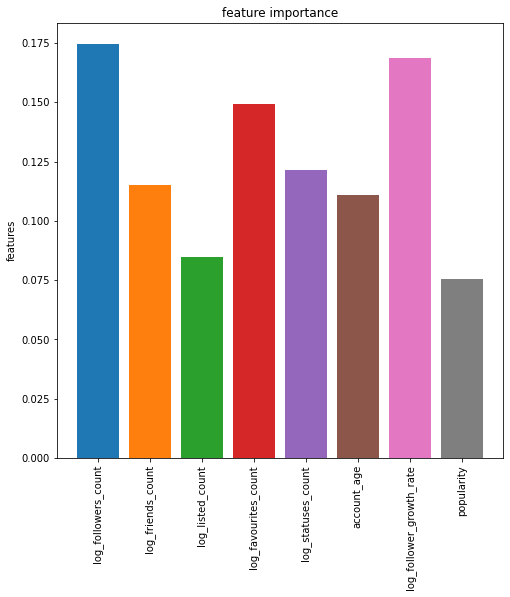

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.bar(x=traning_col, height=ensemble_search.feature_importances_, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
 '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(rotation='vertical')
plt.ylabel('features')
plt.title('feature importance')
plt.show()

##KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_classify = KNeighborsClassifier(n_neighbors=5)
knn_classify.fit(X_train, y_train)
knn_classify_prediction=knn_classify.predict(X_test)
ShowPerformance(knn_classify_prediction, y_test)

Accuracy is 79.1773%
 Precision is 72.9318%
 Recall is 63.5361%
F1 Score is 0.7880



##Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_classify= GaussianNB()
nb_classify.fit(X_train, y_train)
nb_classify_prediction=nb_classify.predict(X_test)
ShowPerformance(nb_classify_prediction, y_test)

Accuracy is 77.1240%
 Precision is 63.8157%
 Recall is 78.6035%
F1 Score is 0.7756

